## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [113]:
tweets = pd.read_csv("twitter_archive_master.csv",parse_dates=['timestamp'], index_col='timestamp')
dogs_info = pd.read_csv("dogs_information.csv")

In [114]:
tweets.tweet_id = tweets.tweet_id.astype(str) 
dogs_info.tweet_id = dogs_info.tweet_id.astype(str)

#The above is necessary as pandas reads in numbers as integers 
# but i want them in string (object) format.

In [115]:
tweets.head()

,tweet_id,source,text,expanded_urls,favorite_count,favorited,retweet_count,retweeted,is_quote_status
timestamp,,,,,,,,,
2017-08-01 00:17:27,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,29330.0,False,5302.0,False,False
2017-07-31 00:18:03,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,22054.0,False,3481.0,False,False
2017-07-29 16:00:24,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,35311.0,False,7761.0,False,False
2017-07-29 00:08:17,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,17813.0,False,2602.0,False,False
2017-07-28 16:27:12,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10364.0,False,1663.0,False,False


In [116]:
dogs_info.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,ratings_str,name
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.8,8.0/10,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.7,7.0/10,a
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.9,9.0/10,a
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.6,6.0/10,a
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.5,5.0/10,NaN


### N.B The following analysis is based on the image predictions with high confidence i.e p1 column.

In [117]:
dogs_info.groupby('p1')['ratings'].sum().sort_values(ascending=False)

p1
golden_retriever      162.546753
Labrador_retriever    105.700000
Pembroke              100.700000
Chihuahua              84.600000
pug                    55.300000
                         ...    
standard_schnauzer      1.200000
EntleBucher             1.100000
groenendael             1.000000
Scotch_terrier          0.900000
Japanese_spaniel        0.500000
Name: ratings, Length: 111, dtype: float64

from above, we can see that the most rated (highest total ratings) dogs breed is golden_retriever which i believe is due to the fact that most dogs in the dataset are golden_retriever, about 150 dogs to be precise. 

In [118]:
dogs_info.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
groenendael             1
Scotch_terrier          1
silky_terrier           1
EntleBucher             1
clumber                 1
Name: p1, Length: 111, dtype: int64

In [119]:
dogs_info.describe()

,img_num,p1_conf,p2_conf,p3_conf,ratings
count,1532.000000,1532.000000,1532.000000,1.532000e+03,1477.000000
mean,1.212794,0.613823,0.141327,6.180374e-02,1.094666
std,0.574115,0.259735,0.102482,5.255780e-02,0.190555
min,1.000000,0.044333,0.000023,2.160900e-07,0.200000
25%,1.000000,0.390981,0.057067,1.540992e-02,1.000000
50%,1.000000,0.614025,0.127964,4.995100e-02,1.100000
75%,1.000000,0.850559,0.203748,9.527215e-02,1.200000
max,4.000000,0.999956,0.467678,2.734190e-01,3.428571


Going by the statiscal details in the table above, we can see that 25% of the dogs' ratings is above 1.2 (which implies ratings over 10) and 75% of the ratings fall below this number. Also on an average, a dog is rated 1.099.

In [120]:
dogs_info[dogs_info.ratings == dogs_info.ratings.max()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,ratings_str,name
1201,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571,24.0/7,Sam


This shows that the highest rated dog is a golden_retriever (a dog named Sam) and there are about 150 golden_retriever dogs in the dataset with an average of 1.169 ratings.

In [121]:
top_rated_avg = dogs_info.groupby('p1')['ratings'].mean().sort_values(ascending=False).to_frame()
top_rated_avg = top_rated_avg.reset_index()
top_rated_avg[top_rated_avg.p1 =='golden_retriever']

,p1,ratings
13,golden_retriever,1.169401


In [122]:
dogs_info[dogs_info.ratings == dogs_info.ratings.min()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,ratings_str,name
376,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True,0.2,2.0/10,Crystal
774,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,0.2,4.0/20,NaN


The lowest ratings go to two dogs' breeds; Maltese_dog and Great_Dane

In [123]:
dogs_info.name.value_counts().to_frame().head(6)

,name
a,43
Cooper,10
Charlie,10
Oliver,9
Tucker,8
Lucy,8


Though the name column had quite a lot of missing values and  some wrong names like "a" which i found was gathered incorrectly, the most common names for dogs in the dataset are Charlie and Cooper.

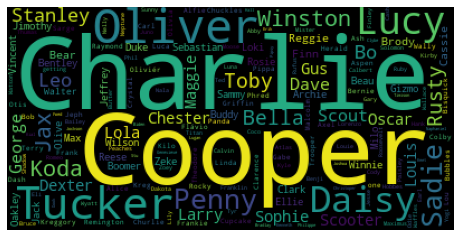

In [138]:
cloud = WordCloud().generate(' '.join(dogs_info.dropna()["name"]))

plt.figure(figsize=(8,6))
plt.imshow(cloud)
plt.axis('off')
plt.show()

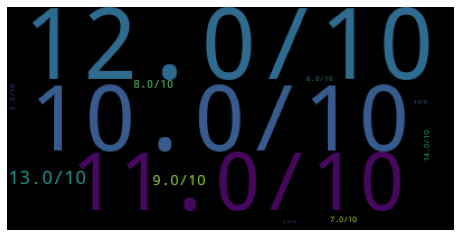

In [139]:
data = dogs_info["ratings_str"].value_counts().to_dict()
cloud = WordCloud().generate_from_frequencies(data)

plt.figure(figsize=(8,6))
plt.imshow(cloud)
plt.axis('off')
plt.show()

The word cloud above shows the most common ratings given to the dogs.

In [127]:
dogs_info.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
groenendael             1
Scotch_terrier          1
silky_terrier           1
EntleBucher             1
clumber                 1
Name: p1, Length: 111, dtype: int64

The top five breeds by count in the dataset are; golden_retriever, Labrador_retriever, Pembroke, Chihuahua and pug in decending order, this implies that the account tweets more about these kinds of dogs than the others.

In [128]:
tweets.describe()

,favorite_count,retweet_count
count,1469.000000,1469.000000
mean,8003.605854,2250.495575
std,11683.130743,4096.515983
min,66.000000,11.000000
25%,1831.000000,523.000000
50%,3786.000000,1137.000000
75%,9941.000000,2595.000000
max,144902.000000,70750.000000


we can infer from the statistical analysis of tweets in the above table that on an average, a tweet from the account has about 8003 likes and 2250 retweets. The highest retweets for a tweet in the dataset is 70750 with 144902 likes and the lowest retweets is 11 with 66 likes. Also 25% of the tweets have above 9941 retweets and 2595 likes.

In [129]:
status = tweets.tweet_id.resample('D').count()
status = status.reset_index()
status["month_year"] = pd.to_datetime(status["timestamp"]).dt.to_period("M")
status.sort_values(by="tweet_id", ascending=False).head()

,timestamp,tweet_id,month_year
14,2015-11-29,19,2015-11
4,2015-11-19,19,2015-11
1,2015-11-16,18,2015-11
10,2015-11-25,14,2015-11
23,2015-12-08,14,2015-12


From above we can see that the highest number of tweets in a day posted by
the account was 19 which was on November, 2015.

In [130]:
def barplot(dataframe, x, y, title):
    plt.figure(figsize=(14,8))
    sns.barplot(data=dataframe, x=x, y=y)
    sns.despine()
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45)
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.tick_params(axis="both", which="major", labelsize=15)
    plt.show()

def lineplot(dataframe, x, y, title):
    plt.figure(figsize=(14,8))
    sns.lineplot(data=dataframe, x=x, y=y)
    sns.despine()
    plt.title(title, fontsize=20)
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.tick_params(axis="both", which="major", labelsize=15)
    plt.show()

In [131]:
status = tweets.tweet_id.resample('M').count()
status = status.reset_index()
status["month_year"] = pd.to_datetime(status["timestamp"]).dt.to_period("M")
status.sort_values(by="tweet_id", ascending=False).head()

,timestamp,tweet_id,month_year
1,2015-12-31,246,2015-12
0,2015-11-30,192,2015-11
2,2016-01-31,127,2016-01
4,2016-03-31,92,2016-03
3,2016-02-29,84,2016-02


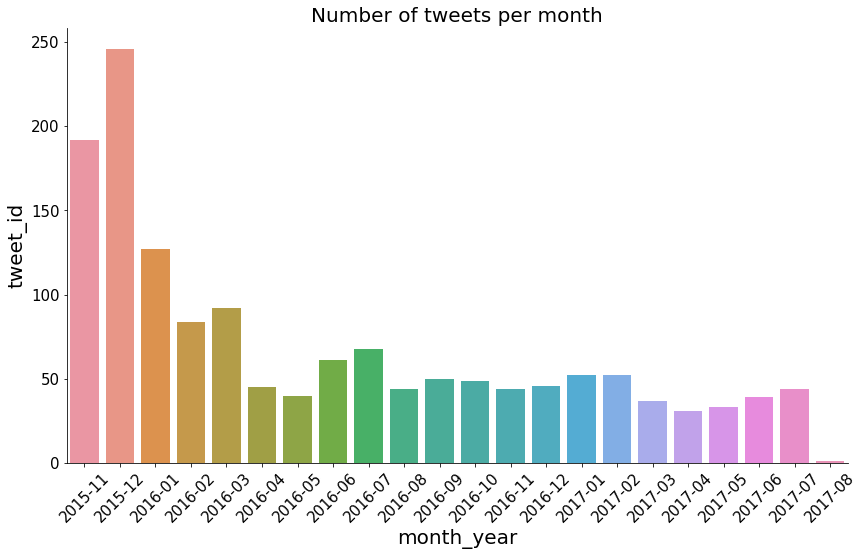

In [140]:
barplot(status,"month_year","tweet_id","Number of tweets per month")

From the plot and table above, we can see that the highest number of tweets posted by the account in a single month was 246 which was in December, 2015 while the lowest was 1 in August, 2017.

In [133]:
timeline = tweets.resample('M').sum()
timeline = timeline.reset_index()
timeline["month_year"] = pd.to_datetime(timeline["timestamp"]).dt.to_period("M")
timeline.head()

,timestamp,favorite_count,retweet_count,month_year
0,2015-11-30,198092.0,73801.0,2015-11
1,2015-12-31,650593.0,258116.0,2015-12
2,2016-01-31,386202.0,130777.0,2016-01
3,2016-02-29,292220.0,100129.0,2016-02
4,2016-03-31,349069.0,112806.0,2016-03


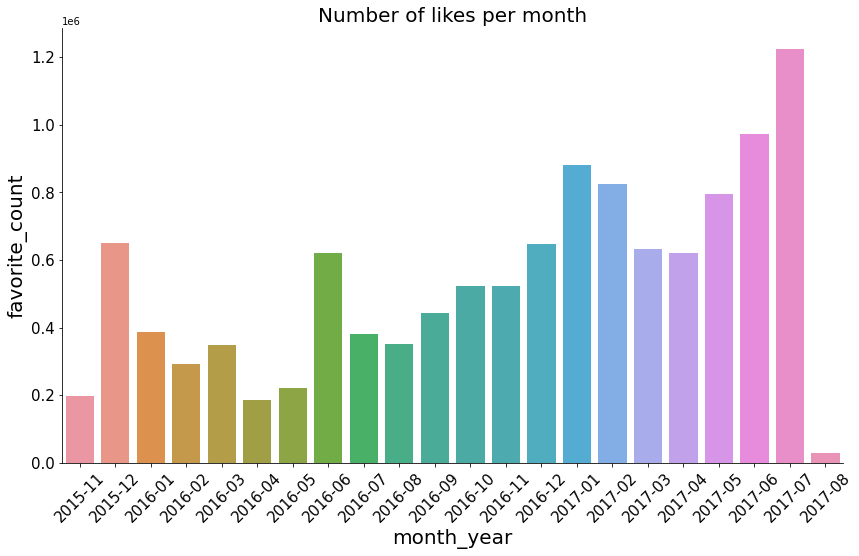

In [134]:
barplot(timeline,"month_year","favorite_count","Number of likes per month")

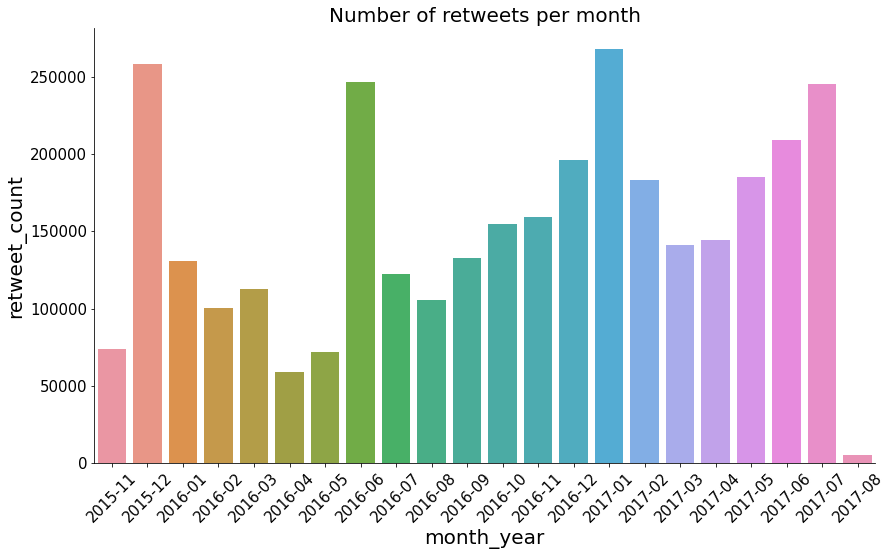

In [135]:
barplot(timeline,"month_year","retweet_count","Number of retweets per month")

One interesting observation from the above plots is, in December, 2015 though the account posted a lot of tweets(the highest number in the dataset), the number of likes and retweets were not the highest, in fact the highest number of retweets was in January, 2017 which was among the months with the lowest number of tweets and the highest number of likes was in July, 2017 which was also among the months with the lowest number of tweets.